In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)
#reading data
pdf=pd.read_csv('https://raw.githubusercontent.com/AIbot7/Dataset/master/headbrain.csv')
print(pdf.shape)
pdf.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [11]:
#collect xand y
X=pdf['Head Size(cm^3)'].values
Y=pdf['Brain Weight(grams)'].values

In [16]:
import matplotlib.pyplot as plt
#mean of x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)
#tot no of values
m=len(X)
#using the formula to calc b1 & b0 or (m=slope) & c
numer=0
denom=0
for i in range(m):
        numer += (X[i]-mean_x) * (Y[i]-mean_y)
        denom += (X[i]-mean_x) ** 2
b1=numer/denom
b0=mean_y - (b1 * mean_x)
#print coeff
print(b1,b0)
    

0.26342933948939945 325.57342104944223


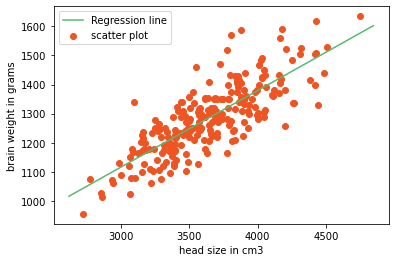

In [17]:
#plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100
#calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = b0 + b1 * x
#ploting line
plt.plot(x,y,color='#58b970',label='Regression line')
#plotting scatter points
plt.scatter(X,Y,c='#ef5423',label='scatter plot')
plt.xlabel('head size in cm3')
plt.ylabel('brain weight in grams')
plt.legend()
plt.show()

In [18]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in scikit learn
X=X.reshape((m,1))
#creating model
reg = LinearRegression()
#fitting trainig data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)
#calculating r2 score
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
